Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [4]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

--2019-06-28 03:38:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-06-28 03:38:50 (124 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [5]:
# Directory with our training happy pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training sad pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

# Print some happy/sad images names.
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

print('total training happy images:', len(os.listdir(train_happy_dir)))
print('total training sad images:', len(os.listdir(train_sad_dir)))

['happy1-02.png', 'happy2-12.png', 'happy2-09.png', 'happy1-09.png', 'happy2-08.png', 'happy2-19.png', 'happy2-14.png', 'happy1-12.png', 'happy1-18.png', 'happy1-14.png']
['sad2-11.png', 'sad2-12.png', 'sad1-14.png', 'sad2-00.png', 'sad2-16.png', 'sad1-15.png', 'sad1-19.png', 'sad2-18.png', 'sad2-14.png', 'sad2-15.png']
total training happy images: 40
total training sad images: 40


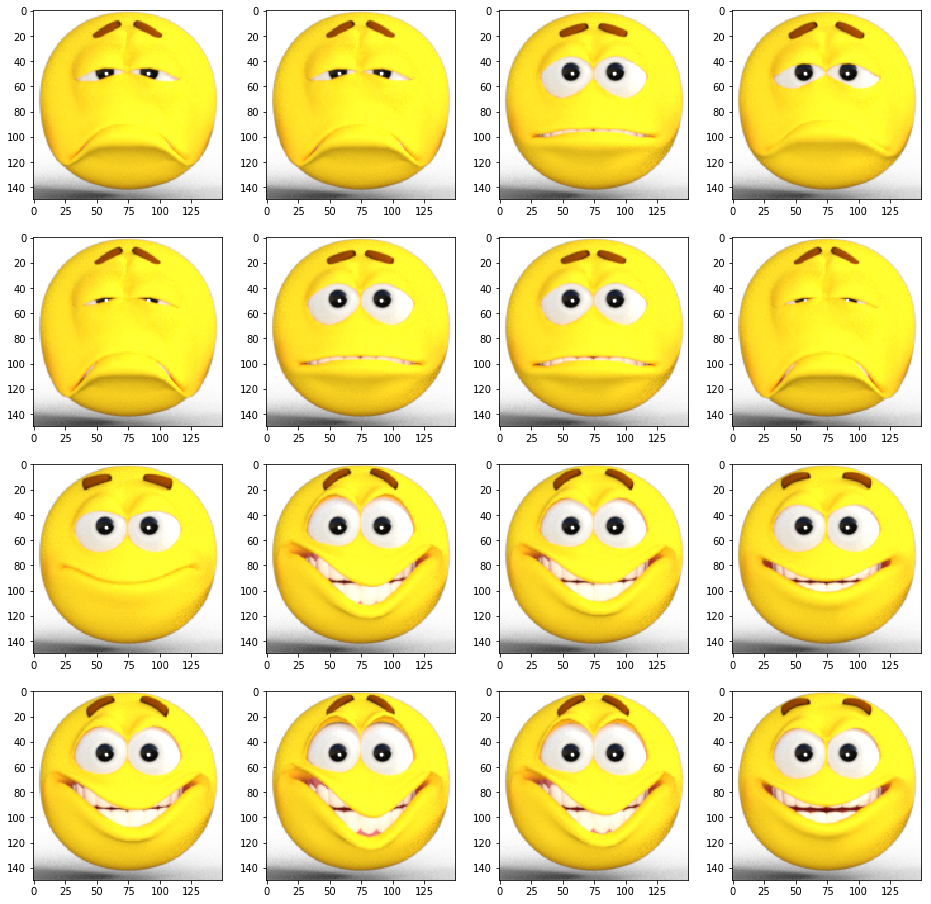

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sad_pix  +next_happy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(140, 140, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

W0628 03:41:00.000979 139964754298752 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 138, 138, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 69, 69, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])    

In [11]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s',
    target_size=(140, 140),
    batch_size=40,
    class_mode='binary'
)

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [13]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    callbacks=[callbacks]
)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
8/8 [==============================] - 7s 870ms/step - loss: 1.7325 - acc: 0.4906
Epoch 2/15
8/8 [==============================] - 6s 772ms/step - loss: 0.4722 - acc: 0.7625
Epoch 3/15
8/8 [==============================] - 6s 767ms/step - loss: 0.2426 - acc: 0.9031
Epoch 4/15
8/8 [==============================] - 6s 767ms/step - loss: 0.0654 - acc: 0.9906
Epoch 5/15
8/8 [==============================] - 6s 768ms/step - loss: 0.0542 - acc: 0.9844
Epoch 6/15
7/8 [=========================>....] - ETA: 0s - loss: 0.0165 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 6s 765ms/step - loss: 0.0151 - acc: 1.0000
